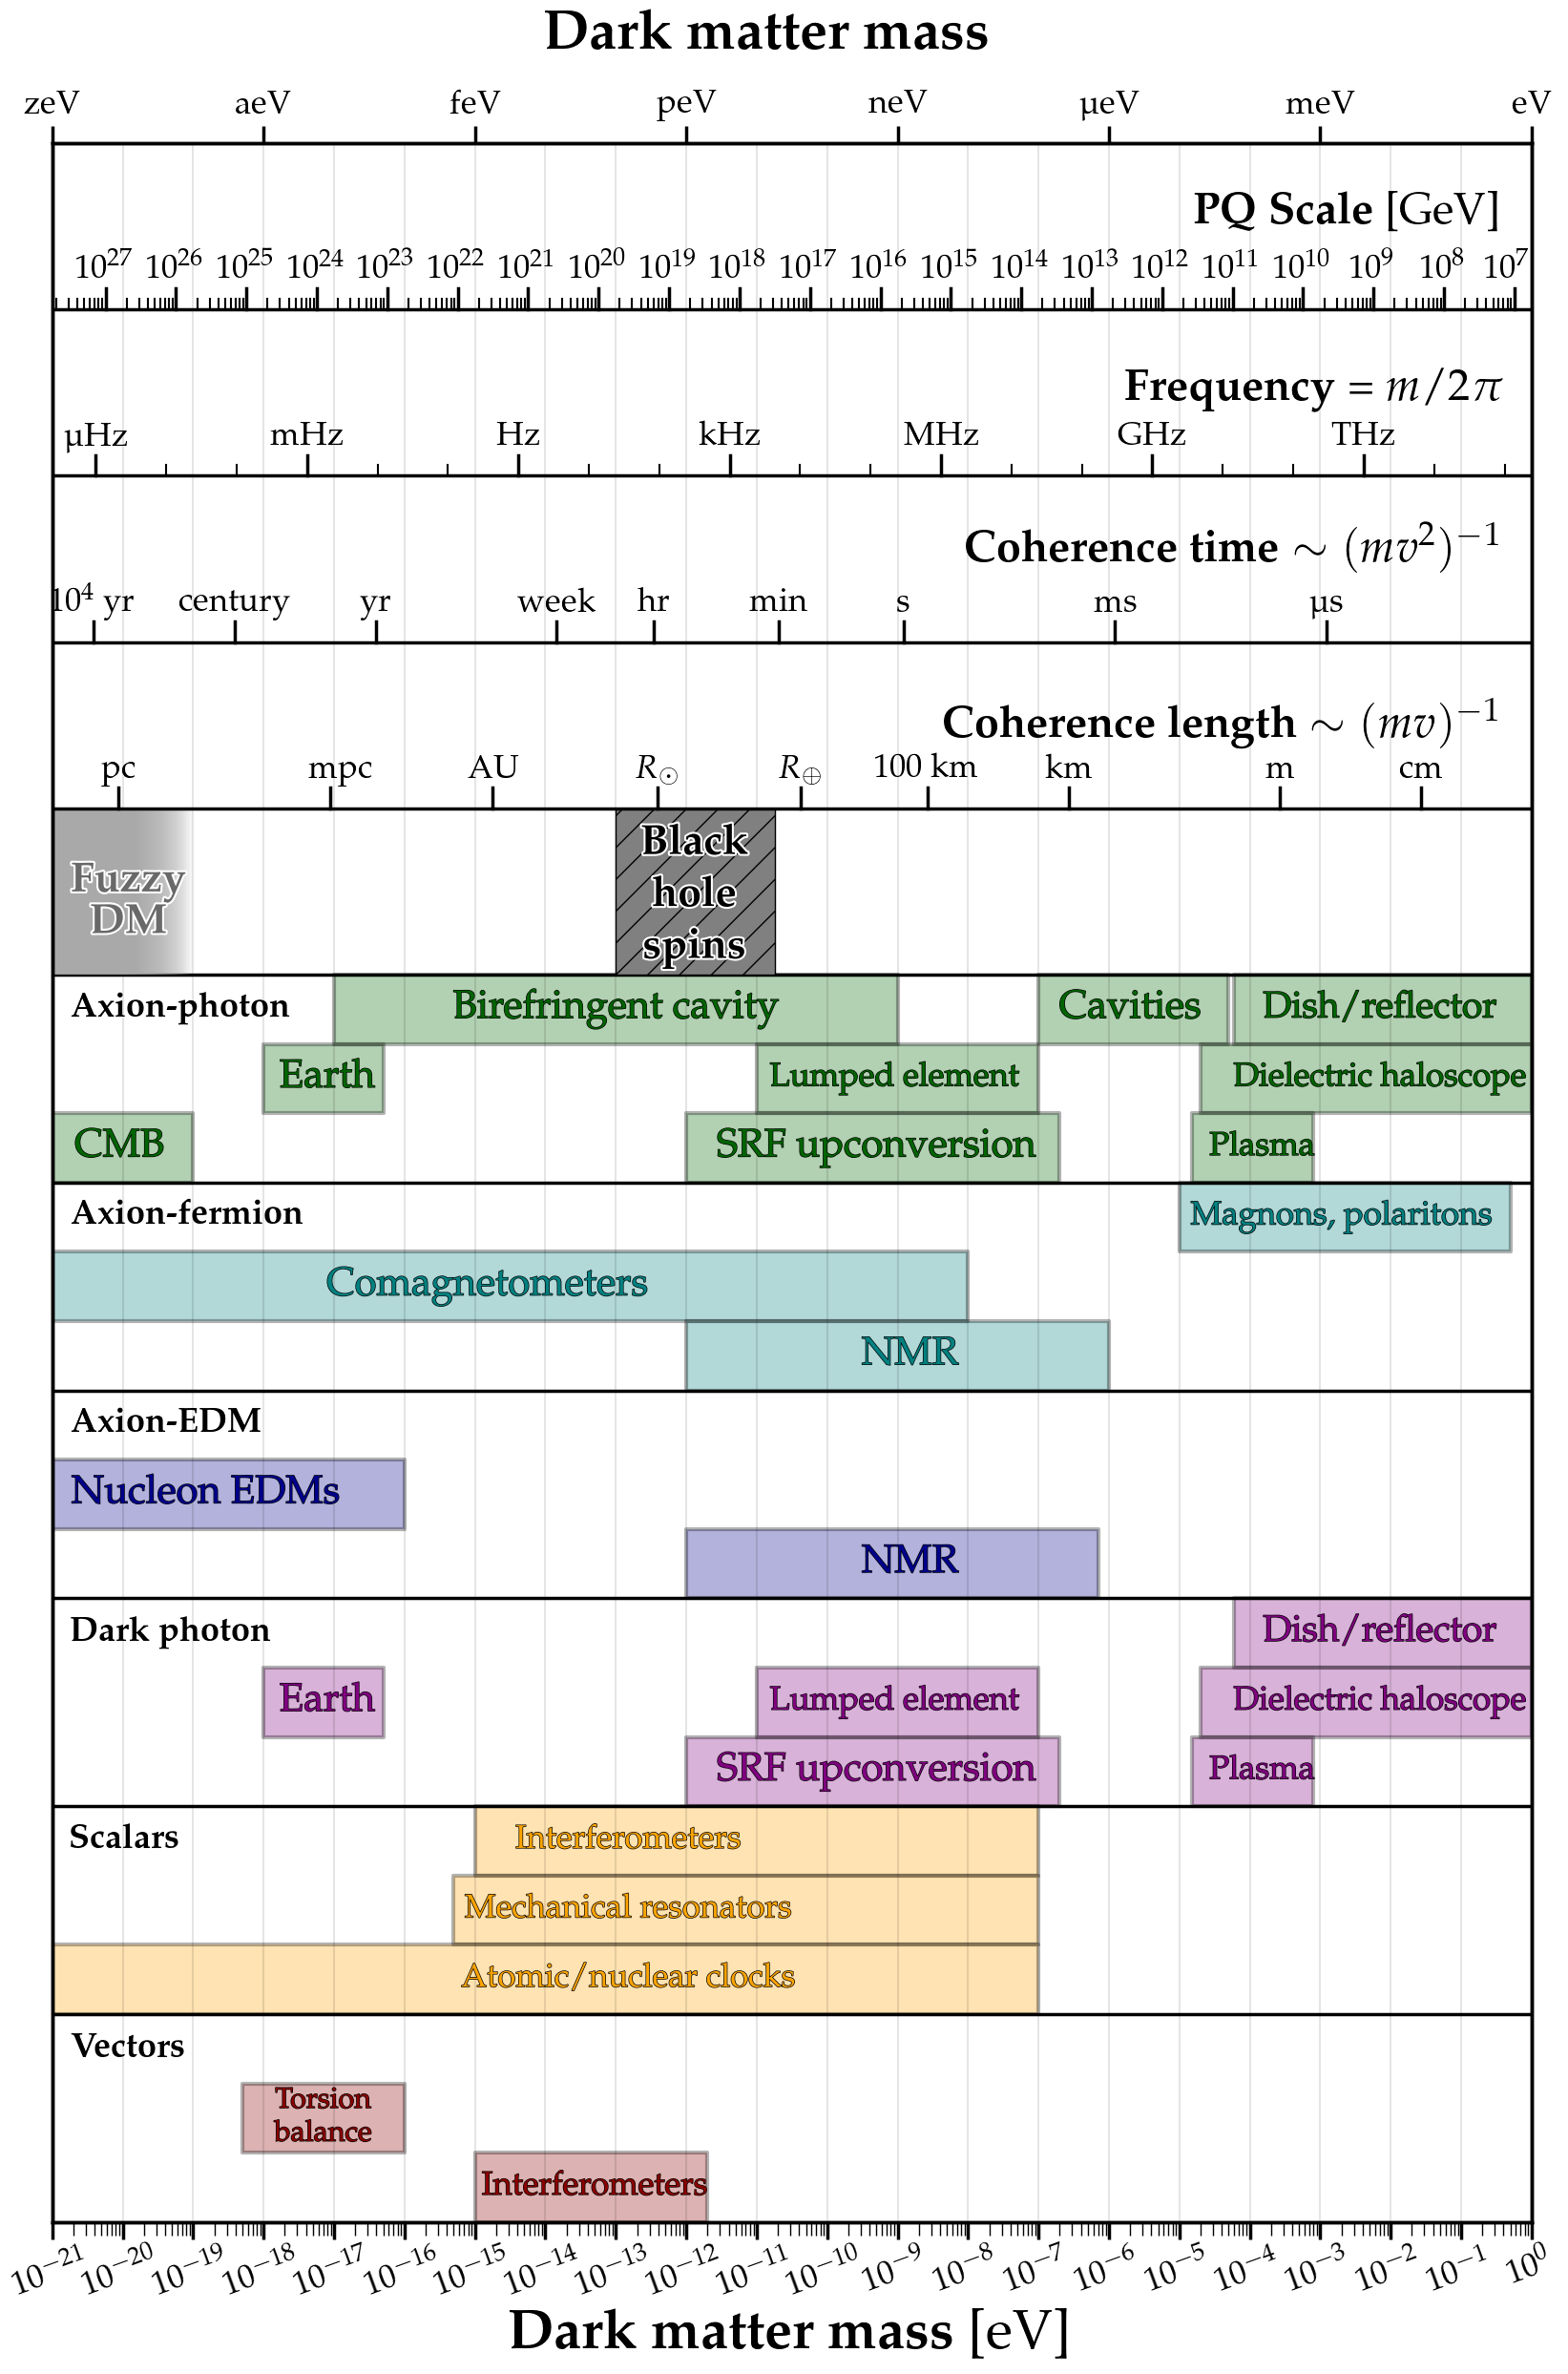

In [167]:
%matplotlib inline
from PlotFuncs import MySaveFig, FigSetup, line_background
from PlotFuncs_ScalarVector import FuzzyDM

import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import *


lw = 2.5
tfs = 25
m_min = 1e-21
m_max = 1

plt.rcParams['axes.linewidth'] = lw
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=tfs)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],})

fig = plt.figure(figsize=(20,20*sqrt(2)))
ax = fig.add_subplot(111)
ax.tick_params(which='major',direction='out',width=2.5,length=13,top=True,pad=3)
ax.tick_params(which='minor',direction='out',width=1,length=10,top=True)

ax.set_xscale('log')
ax.set_xlim([m_min,m_max])
ax.set_ylim([0,1])
ax.set_yticks([])

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=50)
locmin = mpl.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
ax.xaxis.set_major_locator(locmaj)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.xaxis.set_tick_params(labeltop=False,rotation=20,pad=5)
plt.xticks(rotation=20);

ax2 = ax.twiny()
ax2.set_xscale('log')
ax2.set_xlim([m_min,m_max])
ax2.tick_params(which='major',direction='out',width=2.5,length=13,pad=3)
ax2.tick_params(which='minor',direction='out',width=1,length=10)
ax2.set_xticks([1e-21,1e-18,1e-15,1e-12,1e-9,1e-6,1e-3,1])
ax2.set_xticklabels(['zeV','aeV','feV','peV','neV',r'\textmu eV','meV','eV'])

plt.sca(ax)

y1 = 0.92
tl = 0.01
plt.axhline(y1,lw=lw,color='k')
fa = logspace(7,27,27-7+1)
for i in range(len(fa)):
    plt.plot(1e12/(fa[i]/5.7e-6)*array([1,1]),[y1,y1+tl],'k-',lw=lw)
    for x in range(2,10):
        plt.plot(x*1e12/(fa[i]/5.7e-6)*array([1,1]),[y1,y1+tl/2],'k-',lw-2)
    if fa[i]==1e7:
        plt.text(0.8*1e12/(fa[i]/5.7e-6),y1+1.5*tl,r'$10^{'+str(int(log10(fa[i])))+'}$',ha='center',clip_on=True)
    else:
        plt.text(1e12/(fa[i]/5.7e-6),y1+1.5*tl,r'$10^{'+str(int(log10(fa[i])))+'}$',ha='center',clip_on=True)
for x in range(2,10):
    plt.plot(0.1*x*1e12/(fa[-1]/5.7e-6)*array([1,1]),[y1,y1+tl/2],'k-',lw-2)
                
y1 -= 0.08
tl = 0.01
plt.axhline(y1,lw=lw,color='k')
nu_secs = array([1e-9,1e-6,1e-3,1,1e3,1e6,1e9,1e12])
nu_labs = array(['neV',r'\textmu Hz','mHz','Hz','kHz','MHz','GHz','THz'])
for i in range(len(nu_secs)):
    plt.plot(nu_secs[i]/(241.8*1e12)*array([1,1]),[y1,y1+tl],'k-',lw=lw)
    plt.text(nu_secs[i]/(241.8*1e12),y1+1.5*tl,nu_labs[i],ha='center',clip_on=True)
    for x in [10,100]:
        plt.plot(x*nu_secs[i]/(241.8*1e12)*array([1,1]),[y1,y1+tl/2],'k-',lw-2)
       
    
v = (220e3/3e8)
y1 -= 0.08
tl = 0.01
s2eV = 1/6.5821e-16

plt.axhline(y1,lw=lw,color='k')
T_secs = array([1e-6,1e-3,1,60,3600,3600*24,365*3600*24,100*365*3600*24,1e4*365*3600*24])
T_labs = array([r'\textmu s','ms','s','min','hr','week','yr','century','$\,\, 10^4$ yr'])
for i in range(len(T_secs)):
    m = 1/(T_secs[i]*s2eV*v**2)
    plt.plot(m*array([1,1]),[y1,y1+tl],'k-',lw=lw)
    plt.text(m,y1+1.5*tl,T_labs[i],ha='center',clip_on=True)
    
y1 -= 0.08
m2eV = 1/1.9732705e-7
plt.axhline(y1,lw=lw,color='k')
L_m = array([1e-2,1,1e3,100e3,6378.1e3,696340e3,1.496e+11,1e-3*3.086e+16,3.086e+16])
L_labs = array(['cm','m','km',r'100 km',r'$R_\oplus$',r'$R_\odot$','AU','mpc','pc'])
for i in range(len(L_m)):
    m = 1/(L_m[i]*m2eV*v)
    plt.plot(m*array([1,1]),[y1,y1+tl],'k-',lw=lw)
    if L_m[i]==1e-3*3.086e+16:
        plt.text(m*1.4,y1+1.5*tl,L_labs[i],ha='center',clip_on=True)
    else:
        plt.text(m,y1+1.5*tl,L_labs[i],ha='center',clip_on=True)

    
lfs = 42
ax.set_xlabel(r'{\bf Dark matter mass} [eV]',fontsize=lfs)
plt.gcf().text(0.5,0.915,r'{\bf Dark matter mass}',fontsize=lfs,ha='center')

plt.gcf().text(0.885,0.85,r'{\bf PQ Scale} [GeV]',fontsize=lfs*0.8,ha='right')
plt.gcf().text(0.885,0.785,r'{\bf Frequency} = $m/2\pi$',fontsize=lfs*0.8,ha='right')
plt.gcf().text(0.885,0.725,r'{\bf Coherence time} $\sim  (mv^2)^{-1}$',fontsize=lfs*0.8,ha='right')
plt.gcf().text(0.885,0.66,r'{\bf Coherence length} $\sim (mv)^{-1}$',fontsize=lfs*0.8,ha='right')





# Side labels
#ax.axhline(0.65,lw=2.5,color='k',zorder=-10)
ax.axhline(0.6,lw=2.5,color='k',zorder=-10)
ax.axhline(0.5,lw=2.5,color='k',zorder=-10)
ax.axhline(0.4,lw=2.5,color='k',zorder=-10)
ax.axhline(0.3,lw=2.5,color='k',zorder=-10)
ax.axhline(0.2,lw=2.5,color='k',zorder=-10)
ax.axhline(0.1,lw=2.5,color='k',zorder=-10)
lfs = 26
plt.text(m_min*1.8,0.58,r'{\bf Axion-photon}',fontsize=lfs,rotation=0,ha='left',rotation_mode='anchor')
plt.text(m_min*1.8,0.48,r'{\bf Axion-fermion}',fontsize=lfs,rotation=0,ha='left',rotation_mode='anchor')
plt.text(m_min*1.8,0.38,r'{\bf Axion-EDM}',fontsize=lfs,rotation=0,ha='left',rotation_mode='anchor')
plt.text(m_min*1.8,0.28,r'{\bf Dark photon}',fontsize=lfs,rotation=0,ha='left',rotation_mode='anchor')
plt.text(m_min*1.8,0.18,r'{\bf Scalars}',fontsize=lfs,rotation=0,ha='left',rotation_mode='anchor')
plt.text(m_min*1.8,0.08,r'{\bf Vectors}',fontsize=lfs,rotation=0,ha='left',rotation_mode='anchor')


# Black hole spins
m1 = 1e-13
m2 = 1.8e-11
plt.fill_between([m1,m2],[0.6,0.6],y2=0.68,color='gray',alpha=1,zorder=1,hatch='/',edgecolor='k')
plt.text(1.3e-12,0.658,r'{\bf Black}',color='k',fontsize=32,rotation=0,ha='center',path_effects=line_background(3,'w'))
plt.text(1.3e-12,0.633,r'{\bf hole}',color='k',fontsize=32,rotation=0,ha='center',path_effects=line_background(3,'w'))
plt.text(1.3e-12,0.608,r'{\bf spins}',color='k',fontsize=32,rotation=0,ha='center',path_effects=line_background(3,'w'))


# Fuzzy DM
FuzzyDM(ax,ymin=0.6,ymax=0.68,m_min=1e-21,m_max=1e-19,rotation=90,
        g_label=0.25,text_label='',
        alpha=0.05,facecolor='darkgray',zorder=1,
        text_shift=[0.1,1],text_col='w',fs=40,
        path_effects=line_background(2.5,'k'))

plt.text(1.2e-20,0.64,r'{\bf Fuzzy}',color='dimgray',fontsize=32,rotation=0,ha='center',path_effects=line_background(3,'w'))
plt.text(1.2e-20,0.62,r'{\bf DM}',color='dimgray',fontsize=32,rotation=0,ha='center',path_effects=line_background(3,'w'))



alph = 0.3
zo = -11

# Axion-photon
col = 'darkgreen'
y1 = 0.6
# cavities
plt.fill_between([1e-7,5e-5],[y1-1/30,y1-1/30],y2=y1,alpha=0.3,zorder=zo,color=col,lw=3,edgecolor='k')
plt.text(2e-6,y1-0.5/30,'Cavities',fontsize=30,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# Eaarth B-field
plt.fill_between([1e-18,5e-17],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=0.3,zorder=zo,color=col,lw=3,edgecolor='k')
plt.text(0.8e-17,y1-1.5/30,'Earth',fontsize=30,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# CMB
plt.fill_between([1e-21,1e-19],[y1-3/30,y1-3/30],y2=y1-2/30,alpha=0.3,zorder=zo,color=col,lw=3,edgecolor='k')
plt.text(9e-21,y1-2.5/30,'CMB',fontsize=30,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# Birefringent
plt.fill_between([1e-17,1e-9],[y1-1/30,y1-1/30],y2=y1,alpha=0.3,zorder=zo,color=col,lw=3,edgecolor='k')
plt.text(1e-13,y1-0.5/30,'Birefringent cavity',fontsize=30,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# SRF
plt.fill_between([1e-12,2e-7],[y1-3/30,y1-3/30],y2=y1-2/30,alpha=0.3,zorder=zo,color=col,lw=3,edgecolor='k')
plt.text(5e-10,y1-2.5/30,'SRF upconversion',fontsize=30,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# Lumped element
plt.fill_between([1e-11,1e-7],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=0.3,zorder=zo,color=col,lw=3,edgecolor='k')
plt.text(9e-10,y1-1.5/30,'Lumped element',fontsize=25,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# Dish/reflector
plt.fill_between([6e-5,1e0],[y1-1/30,y1-1/30],y2=y1,alpha=0.3,zorder=zo,color=col,lw=3,edgecolor='k')
plt.text(7e-3,y1-0.5/30,'Dish/reflector',fontsize=28,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# Dielectric 
plt.fill_between([2e-5,1],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=0.3,zorder=zo,color=col,lw=3,edgecolor='k')
plt.text(7e-3,y1-1.5/30,'Dielectric haloscope',fontsize=25,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# Plasma 
plt.fill_between([1.5e-5,8e-4],[y1-3/30,y1-3/30],y2=y1-2/30,alpha=0.3,zorder=zo,color=col,lw=3,edgecolor='k')
plt.text(1.5e-4,y1-2.5/30,'Plasma',fontsize=25,color=col,path_effects=line_background(1,'k'),ha='center',va='center')


# Axion-fermion
col = 'teal'
y1 = 0.5
# Magnon/polariton
plt.fill_between([1e-5,5e-1],[y1-1/30,y1-1/30],y2=y1,alpha=0.3,zorder=zo,color=col,lw=3,edgecolor='k')
plt.text(2e-3,y1-0.5/30,'Magnons, polaritons',fontsize=25,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# Comagnetometers
plt.fill_between([1e-21,1e-8],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=0.3,zorder=zo,color=col,lw=3,edgecolor='k')
plt.text(1.5e-15,y1-1.5/30,'Comagnetometers',fontsize=30,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# NMR
plt.fill_between([1e-12,1e-6],[y1-3/30,y1-3/30],y2=y1-2/30,alpha=0.3,zorder=zo,color=col,lw=3,edgecolor='k')
plt.text(1.5e-9,y1-2.5/30,'NMR',fontsize=30,color=col,path_effects=line_background(1,'k'),ha='center',va='center')




# Axion-EDM
col = 'darkblue'
y1 = 0.4

plt.fill_between([1e-21,1e-16],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=0.3,zorder=zo,color=col,lw=3,edgecolor='k')
plt.text(1.5e-19,y1-1.5/30,'Nucleon EDMs',fontsize=30,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

plt.fill_between([1e-12,7e-7],[y1-3/30,y1-3/30],y2=y1-2/30,alpha=0.3,zorder=zo,color=col,lw=3,edgecolor='k')
plt.text(1.5e-9,y1-2.5/30,'NMR',fontsize=30,color=col,path_effects=line_background(1,'k'),ha='center',va='center')





# Dark photon
col = 'purple'
y1 = 0.3
# Earth
plt.fill_between([1e-18,5e-17],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=0.3,zorder=zo,color=col,lw=3,edgecolor='k')
plt.text(0.8e-17,y1-1.5/30,'Earth',fontsize=30,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# SRF
plt.fill_between([1e-12,2e-7],[y1-3/30,y1-3/30],y2=y1-2/30,alpha=0.3,zorder=zo,color=col,lw=3,edgecolor='k')
plt.text(5e-10,y1-2.5/30,'SRF upconversion',fontsize=30,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# Lumped element
plt.fill_between([1e-11,1e-7],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=0.3,zorder=zo,color=col,lw=3,edgecolor='k')
plt.text(9e-10,y1-1.5/30,'Lumped element',fontsize=25,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# Dish/reflector
plt.fill_between([6e-5,1e0],[y1-1/30,y1-1/30],y2=y1,alpha=0.3,zorder=zo,color=col,lw=3,edgecolor='k')
plt.text(7e-3,y1-0.5/30,'Dish/reflector',fontsize=28,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# Dielectric 
plt.fill_between([2e-5,1],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=0.3,zorder=zo,color=col,lw=3,edgecolor='k')
plt.text(7e-3,y1-1.5/30,'Dielectric haloscope',fontsize=25,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# Plasma 
plt.fill_between([1.5e-5,8e-4],[y1-3/30,y1-3/30],y2=y1-2/30,alpha=0.3,zorder=zo,color=col,lw=3,edgecolor='k')
plt.text(1.5e-4,y1-2.5/30,'Plasma',fontsize=25,color=col,path_effects=line_background(1,'k'),ha='center',va='center')




# Scalars
col = 'orange'
y1 = 0.2

plt.fill_between([1e-15,1e-7],[y1-1/30,y1-1/30],y2=y1,alpha=0.3,zorder=zo,color=col,lw=3,edgecolor='k')
plt.text(1.5e-13,y1-0.5/30,'Interferometers',fontsize=25,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

plt.fill_between([5e-16,1e-7],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=0.3,zorder=zo,color=col,lw=3,edgecolor='k')
plt.text(1.5e-13,y1-1.5/30,'Mechanical resonators',fontsize=25,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

plt.fill_between([1e-21,1e-7],[y1-3/30,y1-3/30],y2=y1-2/30,alpha=0.3,zorder=zo,color=col,lw=3,edgecolor='k')
plt.text(1.5e-13,y1-2.5/30,'Atomic/nuclear clocks',fontsize=25,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

# Vectors
col = 'darkred'
y1 = 0.1
plt.fill_between([5e-19,1e-16],[y1-2/30,y1-2/30],y2=y1-1/30,alpha=0.3,zorder=zo,color=col,lw=3,edgecolor='k')
plt.text(0.7e-17,y1-1.5/30,'Torsion \n balance',fontsize=22,color=col,path_effects=line_background(1,'k'),ha='center',va='center')

plt.fill_between([1e-15,2e-12],[y1-3/30,y1-3/30],y2=y1-2/30,alpha=0.3,zorder=zo,color=col,lw=3,edgecolor='k')
plt.text(0.5e-13,y1-2.5/30,'Interferometers',fontsize=25,color=col,path_effects=line_background(1,'k'),ha='center',va='center')


for m in arange(-21,1):
    plt.plot([10.0**m,10.0**m],[0,1],'k-',alpha=0.1,zorder=-10)

MySaveFig(fig,'Cheatsheet')